In [9]:
from mplsoccer import Pitch, FontManager, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rcParams['text.color'] = '#c7d5cc'  # set the default text color

df = pd.read_csv('../data/events_simplified/3753973.csv')

In [10]:
team1, team2 = df['team'].unique()
team1, team2 

('Chelsea', 'West Ham United')

In [11]:
mask_team1 = (df.type == 'Pass') & (df.team == team2)
print(mask_team1)

0       False
1       False
2       False
3       False
4       False
        ...  
3473    False
3474    False
3475    False
3476    False
3477    False
Length: 3478, dtype: bool


In [12]:
def split_locations(df, location_columns):
    new_df = df.copy()
    for column in location_columns:
        index = new_df.columns.get_loc(column)
        new_df.insert(index + 1, f'{column}_x', 0)
        new_df.insert(index + 2, f'{column}_y', 0)
        new_df = new_df.astype({f'{column}_x': np.float64, f'{column}_y': np.float64})
        for i in range(len(df)):
            x, y = new_df.iloc[i][column][1:-1].replace(' ', '').split(',')
            new_df.iat[i, index + 1] = float(x)
            new_df.iat[i, index + 2] = float(y)
        new_df.drop(column, axis = 1, inplace=True)
    return new_df

In [13]:
df_pass = df.loc[mask_team1, ['location', 'pass_end_location', 'pass_outcome']]
df_pass = split_locations(df_pass, location_columns=['location', 'pass_end_location'])
df_pass

,location_x,location_y,pass_end_location_x,pass_end_location_y,pass_outcome
37,39.5,62.2,48.4,57.8,NaN
41,48.4,57.8,42.3,52.8,NaN
43,42.3,52.8,48.4,50.6,NaN
46,48.8,48.6,43.8,54.0,NaN
60,80.3,39.9,90.8,52.6,NaN
...,...,...,...,...,...
3434,63.4,23.7,54.8,28.5,NaN
3437,54.8,28.5,50.6,8.7,NaN
3441,50.9,7.2,101.8,10.2,NaN
3450,30.9,22.3,15.7,37.9,NaN


In [14]:
df_pass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 37 to 3453
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location_x           377 non-null    float64
 1   location_y           377 non-null    float64
 2   pass_end_location_x  377 non-null    float64
 3   pass_end_location_y  377 non-null    float64
 4   pass_outcome         107 non-null    object 
dtypes: float64(4), object(1)
memory usage: 17.7+ KB


In [15]:
mask_complete = df_pass.pass_outcome.isnull()
mask_complete

37       True
41       True
43       True
46       True
60       True
        ...  
3434     True
3437     True
3441     True
3450     True
3453    False
Name: pass_outcome, Length: 377, dtype: bool

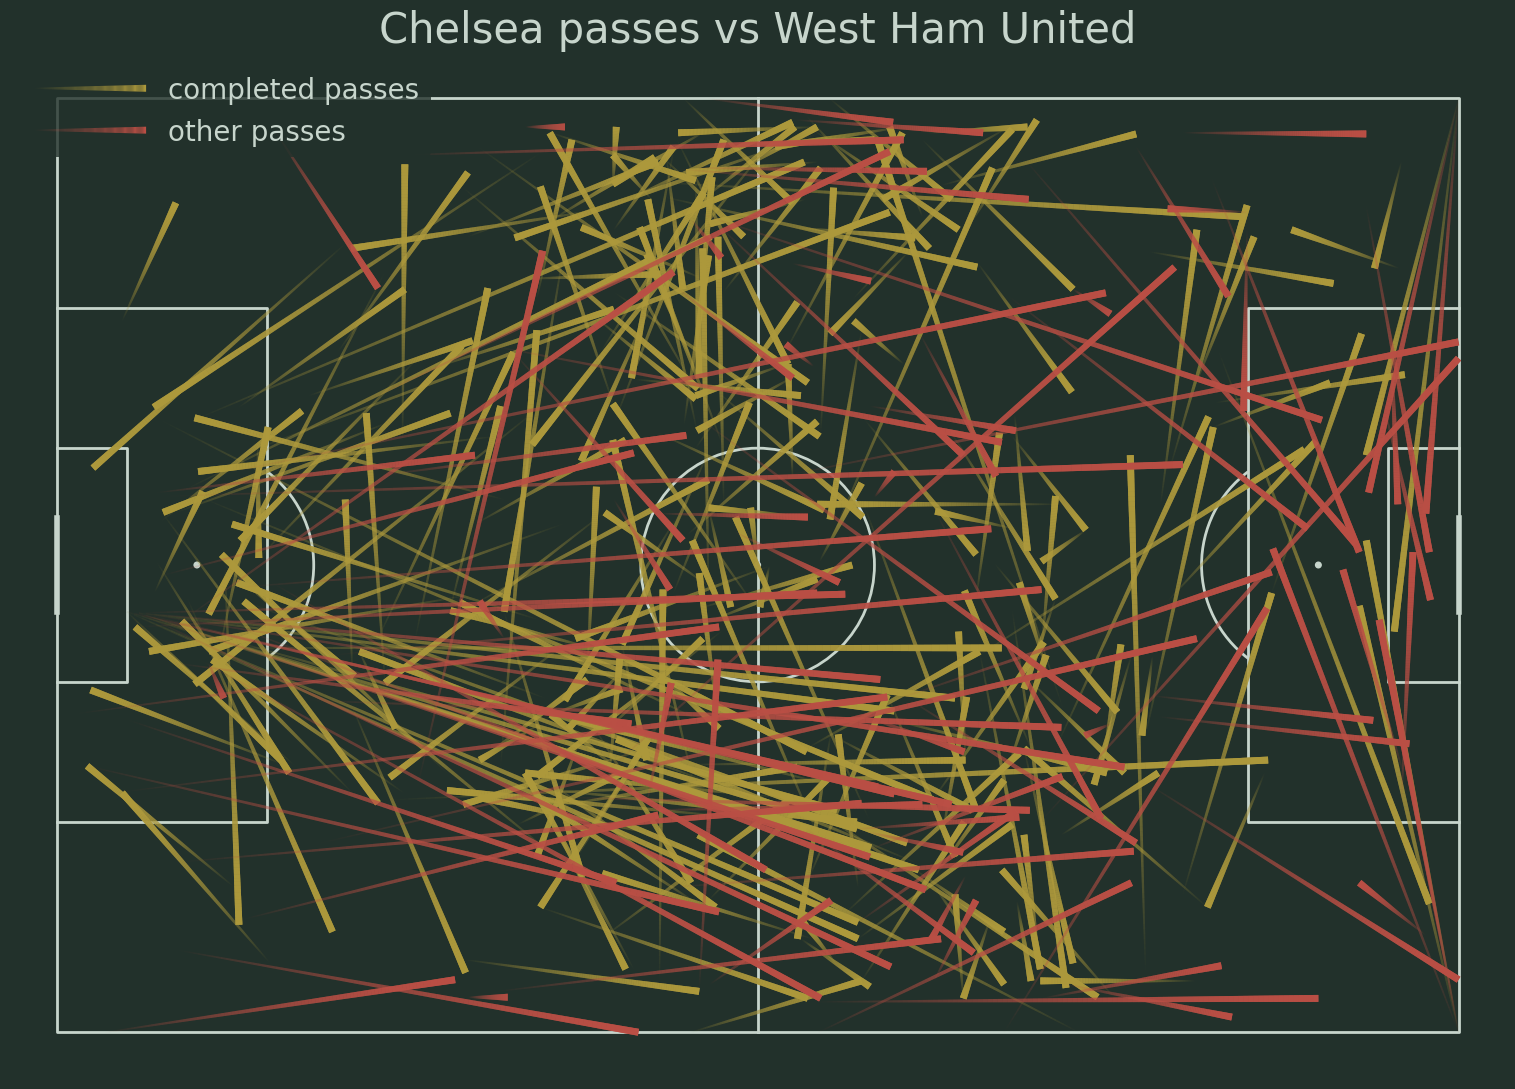

In [16]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the completed passes
lc1 = pitch.lines(df_pass[mask_complete].location_x, df_pass[mask_complete].location_y,
                  df_pass[mask_complete].pass_end_location_x, df_pass[mask_complete].pass_end_location_y,
                  lw=5, transparent=True, comet=True, label='completed passes',
                  color='#ad993c', ax=ax)

# Plot the other passes
lc2 = pitch.lines(df_pass[~mask_complete].location_x, df_pass[~mask_complete].location_y,
                  df_pass[~mask_complete].pass_end_location_x, df_pass[~mask_complete].pass_end_location_y,
                  lw=5, transparent=True, comet=True, label='other passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
ax_title = ax.set_title(f'{team1} passes vs {team2}', fontsize=30)